# MNIST Digit Classification with Convolutional Neural Network (CNN)

**Discipline(s):** Computer Vision, Deep Learning

colab에서 돌릴 경우, 런타임 유형을 GPU로 변경해주세요.

## 1. Import Statements

---



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

## 2. Data Preprocessing

---



The first step is to preprocess our data.

In [14]:
BATCH_SIZE = 128
EPOCHS = 20
LEARNING_RATE = 0.01
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [4]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 458kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.66MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.2MB/s]


In [5]:
X_train = train_dataset.data
y_train = train_dataset.targets
X_test = test_dataset.data
y_test = test_dataset.targets

print("Training Images:", X_train.shape)  # [60000, 28, 28]
print("Testing Images:", X_test.shape)    # [10000, 28, 28]
print("Training Labels:", y_train.shape)  # [60000]
print("Test Labels:", y_test.shape)       # [10000]

Training Images: torch.Size([60000, 28, 28])
Testing Images: torch.Size([10000, 28, 28])
Training Labels: torch.Size([60000])
Test Labels: torch.Size([10000])


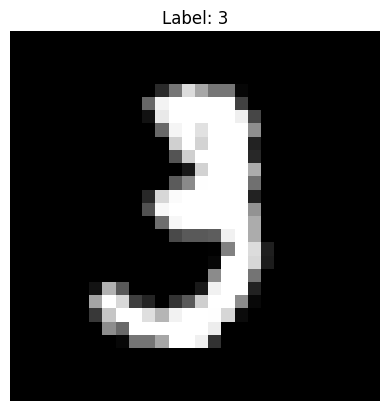

In [6]:
plt.imshow(X_train[10], cmap='gray')
plt.title(f"Label: {y_train[10].item()}")
plt.axis('off')
plt.show()

## 3. Convolutional Neural Network (CNN)

---



### 3.1. Define the Model

We then have to define our convolutional neural network.

In [8]:
# CNN 모델 정의 -> 차원이 어떻게 될지 생각하면서 코드 빈칸을 채워주세요.
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride = 1, padding=1), # 30x30 -> 28x28
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 28x28 -> 14x14

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride = 1), # 14x14 -> 12x12
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # 12x12 -> 6x6

            # fully connected layer 전, flatten 과정 필요
            nn.Flatten(),
            nn.Linear(64*6*6, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

In [9]:
# 모델 준비
model = SimpleCNN().to(DEVICE)

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

### 3.2. Train the Model

In [12]:
def train(model, loader):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for x, y in loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * y.size(0)
        correct += (output.argmax(dim=1) == y).sum().item()
        total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [13]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            output = model(x)
            loss = criterion(output, y)

            total_loss += loss.item() * y.size(0)
            correct += (output.argmax(dim=1) == y).sum().item()
            total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [15]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.0491, Train Acc: 0.9856 | Test Loss: 0.0677, Test Acc: 0.9812
[Epoch 2] Train Loss: 0.0417, Train Acc: 0.9879 | Test Loss: 0.0793, Test Acc: 0.9807
[Epoch 3] Train Loss: 0.0420, Train Acc: 0.9881 | Test Loss: 0.0765, Test Acc: 0.9804
[Epoch 4] Train Loss: 0.0427, Train Acc: 0.9878 | Test Loss: 0.0727, Test Acc: 0.9825
[Epoch 5] Train Loss: 0.0401, Train Acc: 0.9884 | Test Loss: 0.0696, Test Acc: 0.9858
[Epoch 6] Train Loss: 0.0445, Train Acc: 0.9881 | Test Loss: 0.0773, Test Acc: 0.9821
[Epoch 7] Train Loss: 0.0399, Train Acc: 0.9892 | Test Loss: 0.0791, Test Acc: 0.9809
[Epoch 8] Train Loss: 0.0477, Train Acc: 0.9871 | Test Loss: 0.0705, Test Acc: 0.9849
[Epoch 9] Train Loss: 0.0383, Train Acc: 0.9899 | Test Loss: 0.0672, Test Acc: 0.9836
[Epoch 10] Train Loss: 0.0387, Train Acc: 0.9894 | Test Loss: 0.0733, Test Acc: 0.9832
[Epoch 11] Train Loss: 0.0407, Train Acc: 0.9892 | Test Loss: 0.0911, Test Acc: 0.9812
[Epoch 12] Train Loss: 0.0397, Train Acc: 0.9899 | T

### 3.3. 시각화

Finally, we can plot the curves.

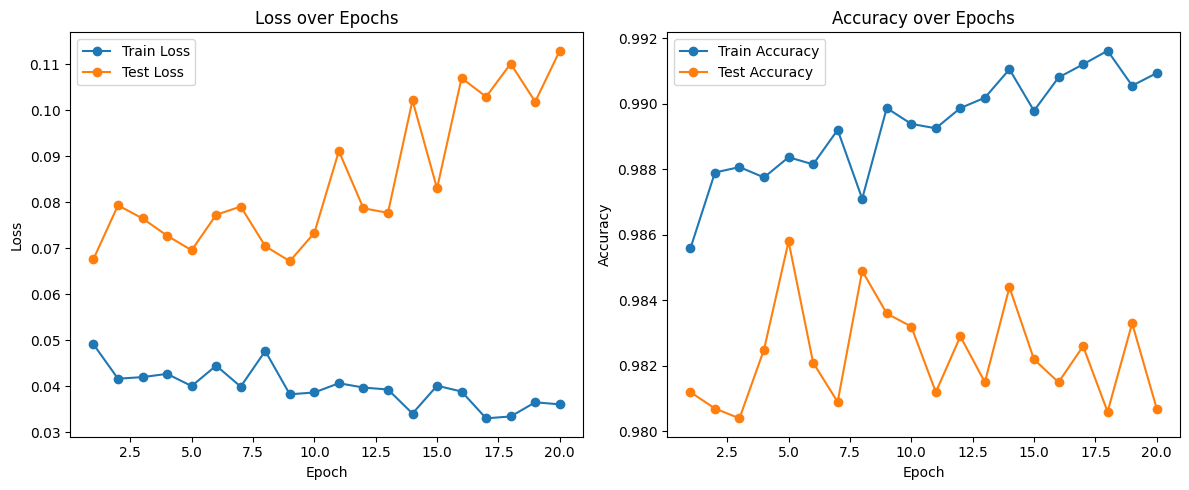

In [16]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

처음보다 점점 더 테스트 데이터에 맞게 변형되면서 train accuracy는 좋아지는 경향을 보이지만 test accuracy는 작아지는 것으로 보아 과적합 현상이 발생하는 것으로 볼 수 있다. 단순한 데이터셋에 비해 과하게 복잡한 모델을 구성했기 때문에 테스트셋에 맞게 변형되는 것으로 보인다.

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [17]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

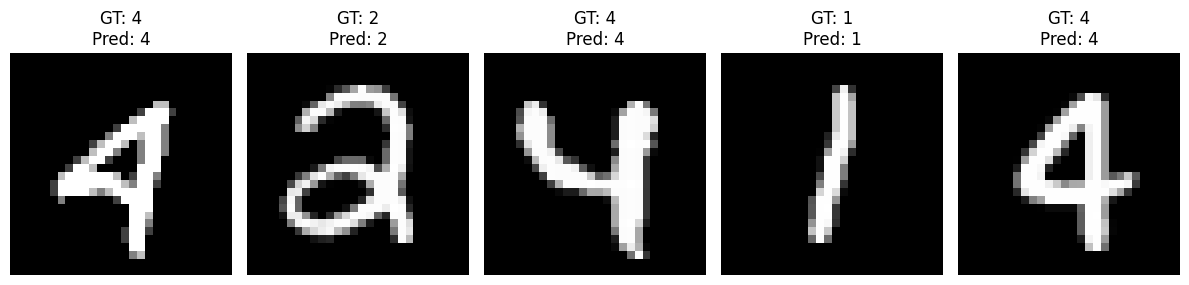

In [18]:
show_random_predictions(model, test_dataset, num_images=5)

## ResNet

In [21]:
BATCH_SIZE = 128
EPOCHS = 20
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [36]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        # # bottleneck
        # self.expansion = 4

        # # 1x1
        # self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        # # batch normalization
        # self.bn1 = nn.BatchNorm2d(out_channels)

        # # 3x3
        # self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        # self.bn2 = nn.BatchNorm2d(out_channels)

        # # 1x1
        # self.conv3 = nn.Conv2d(out_channels, out_channels*self.expansion, kernel_size=3, stride=1, padding=1)
        # self.bn3 = nn.BatchNorm2d(out_channels*self.expansion)

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # activation function
        self.relu = nn.ReLU()

        # Skip connection: 채널 수가 다르면 어떤 convolution layer를 사용하는게 좋을지 생각해주세요.
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)

        # 빈칸 채우기
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        return self.relu(out)

In [37]:
class ResNetLike(nn.Module):
    def __init__(self):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # layer 등을 추가로 더 쌓으셔도 됩니다.
        self.layer1 = ResidualBlock(16, 32)
        self.layer2 = ResidualBlock(32, 64)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()

        # 빈칸을 채워주세요.
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        # 빈칸을 채워주세요.
        out = self.stem(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.avgpool(out)
        out = self.flatten(out)
        out = self.fc(out) # resnet은 cnn 층을 늘리고 fc 층을 줄임 vgg에 비해서
        return out

In [38]:
model = ResNetLike().to(DEVICE)

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [40]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.3879, Train Acc: 0.9208 | Test Loss: 0.1137, Test Acc: 0.9713
[Epoch 2] Train Loss: 0.0611, Train Acc: 0.9855 | Test Loss: 0.0875, Test Acc: 0.9727
[Epoch 3] Train Loss: 0.0415, Train Acc: 0.9889 | Test Loss: 0.0559, Test Acc: 0.9839
[Epoch 4] Train Loss: 0.0326, Train Acc: 0.9915 | Test Loss: 0.0323, Test Acc: 0.9901
[Epoch 5] Train Loss: 0.0282, Train Acc: 0.9917 | Test Loss: 0.0299, Test Acc: 0.9907
[Epoch 6] Train Loss: 0.0239, Train Acc: 0.9932 | Test Loss: 0.0560, Test Acc: 0.9833
[Epoch 7] Train Loss: 0.0206, Train Acc: 0.9942 | Test Loss: 0.0247, Test Acc: 0.9918
[Epoch 8] Train Loss: 0.0190, Train Acc: 0.9947 | Test Loss: 0.0225, Test Acc: 0.9933
[Epoch 9] Train Loss: 0.0166, Train Acc: 0.9950 | Test Loss: 0.0332, Test Acc: 0.9896
[Epoch 10] Train Loss: 0.0159, Train Acc: 0.9953 | Test Loss: 0.0287, Test Acc: 0.9907
[Epoch 11] Train Loss: 0.0136, Train Acc: 0.9960 | Test Loss: 0.0317, Test Acc: 0.9890
[Epoch 12] Train Loss: 0.0128, Train Acc: 0.9962 | T

이전의 simple CNN 모델보다 train set과 test set 모두에 대해 더 좋은 정확도를 보여주는 것을 확인할 수 있다.

### 시각화

Finally, we can plot the curves.

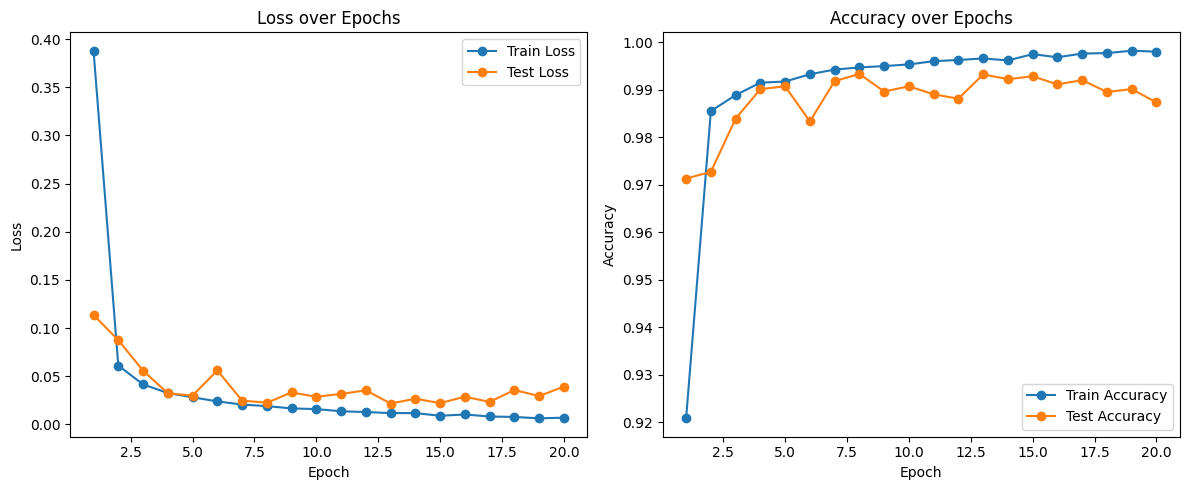

In [41]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

### Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [42]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

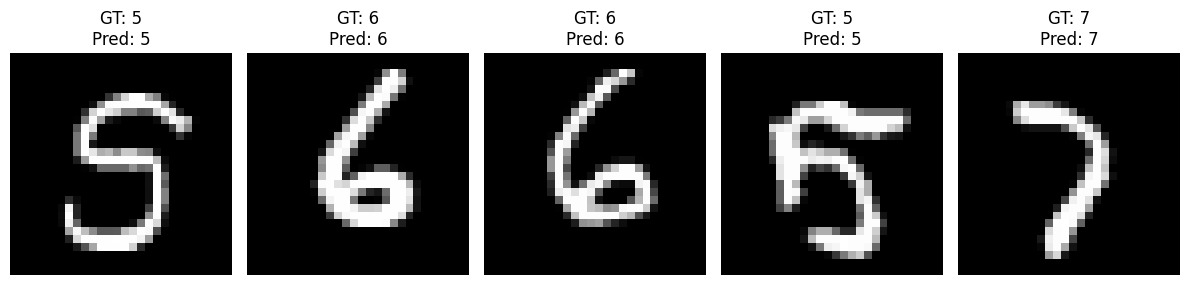

In [43]:
show_random_predictions(model, test_dataset, num_images=5)

# 다른 데이터셋으로도 진행해보기: CIFAR-10

In [9]:
BATCH_SIZE = 128
EPOCHS = 100
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
from torchvision import datasets, transforms

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform_train, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [6]:
class BottleneckResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super().__init__()

        # bottleneck
        self.expansion = 4 # out_channels는 사실 중간 out_channels, 전체 블록의 출력 채널 수는 out_channels * self.expansion

        # 1x1
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False)
        # batch normalization
        self.bn1 = nn.BatchNorm2d(out_channels)

        # 3x3
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # 1x1
        self.conv3 = nn.Conv2d(out_channels, out_channels*self.expansion, kernel_size=1, stride=1)
        self.bn3 = nn.BatchNorm2d(out_channels*self.expansion)

        # activation function
        self.relu = nn.ReLU()

        if in_channels != out_channels*self.expansion or stride != 1:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels*self.expansion, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels*self.expansion)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)

        # 빈칸 채우기
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        out += identity
        return self.relu(out)

In [7]:
class ResNetForCIFAR10WithBottleneck(nn.Module):
    def __init__(self):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # layer 등을 추가로 더 쌓으셔도 됩니다.
        self.block1 = BottleneckResidualBlock(64, 64, 1)
        self.block2 = BottleneckResidualBlock(256, 128, 2) # downsample
        self.block3 = BottleneckResidualBlock(512, 128, 1)
        self.block4 = BottleneckResidualBlock(512, 256, 2) # downsample
        self.block5 = BottleneckResidualBlock(1024, 256, 1)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()

        # 빈칸을 채워주세요.
        self.fc = nn.Linear(1024, 10)

    def forward(self, x):
        # 빈칸을 채워주세요.
        out = self.stem(x)
        out = self.block1(out)    # [B, 256, 32, 32]
        out = self.block2(out)    # [B, 512, 16, 16]
        out = self.block3(out)    # [B, 512, 16, 16]
        out = self.block4(out)    # [B, 1024, 8, 8]
        out = self.block5(out)    # [B, 1024, 8, 8]
        out = self.avgpool(out)   # [B, 1024, 1, 1]
        out = self.flatten(out)   # [B, 1024]
        out = self.fc(out)        # [B, 10] # resnet은 cnn 층을 늘리고 fc 층을 줄임 vgg에 비해서
        return out

In [10]:
model = ResNetForCIFAR10WithBottleneck().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [14]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 1.3372, Train Acc: 0.5147 | Test Loss: 1.0804, Test Acc: 0.6135
[Epoch 2] Train Loss: 0.9666, Train Acc: 0.6538 | Test Loss: 0.9982, Test Acc: 0.6610
[Epoch 3] Train Loss: 0.8091, Train Acc: 0.7158 | Test Loss: 0.8485, Test Acc: 0.7138
[Epoch 4] Train Loss: 0.6967, Train Acc: 0.7554 | Test Loss: 0.7271, Test Acc: 0.7548
[Epoch 5] Train Loss: 0.6192, Train Acc: 0.7856 | Test Loss: 0.8803, Test Acc: 0.7194
[Epoch 6] Train Loss: 0.5642, Train Acc: 0.8037 | Test Loss: 0.5841, Test Acc: 0.8037
[Epoch 7] Train Loss: 0.5169, Train Acc: 0.8213 | Test Loss: 0.6103, Test Acc: 0.7982
[Epoch 8] Train Loss: 0.4836, Train Acc: 0.8327 | Test Loss: 0.5141, Test Acc: 0.8228
[Epoch 9] Train Loss: 0.4541, Train Acc: 0.8433 | Test Loss: 0.5399, Test Acc: 0.8154
[Epoch 10] Train Loss: 0.4325, Train Acc: 0.8527 | Test Loss: 0.4994, Test Acc: 0.8303
[Epoch 11] Train Loss: 0.4090, Train Acc: 0.8582 | Test Loss: 0.5644, Test Acc: 0.8175
[Epoch 12] Train Loss: 0.3912, Train Acc: 0.8645 | T

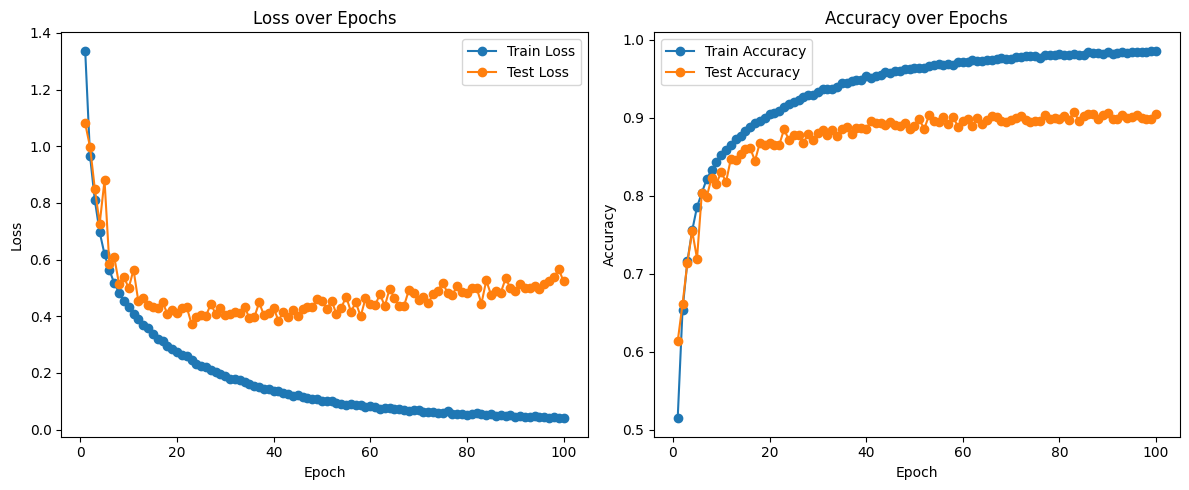

In [15]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

학습 데이터셋에 대한 정확도보다 테스트 셋에 대한 정확도가 꽤 낮은 걸 보아 오버피팅 문제가 있는 것으로 보인다. 모델을 단순화 하거나 더 다양한 데이터를 학습시키거나 드랍아웃 같은 정규화 등의 시도가 필요해 보인다.

In [16]:
CIFAR10_CLASSES = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

def show_random_predictions(model, dataset, num_images=5, device='cuda'):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(device)
    with torch.no_grad():
        outputs = model(images)
        preds = outputs.argmax(dim=1)

    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        img = images[i].cpu().permute(1, 2, 0)  # [C, H, W] → [H, W, C]
        plt.imshow(img)
        gt_label = CIFAR10_CLASSES[labels[i].item()]
        pred_label = CIFAR10_CLASSES[preds[i].item()]
        plt.title(f"GT: {gt_label}\nPred: {pred_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


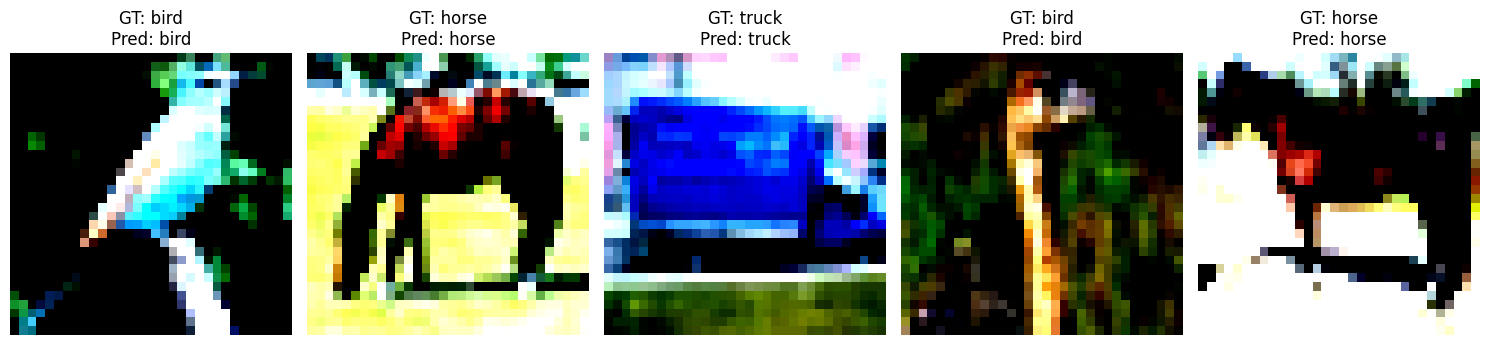

In [17]:
show_random_predictions(model, test_dataset, num_images=5)